# Week 10 Homework: Linear Algebra

In [1]:
import numpy as np
import math
from numpy.linalg import norm, inv

1.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

In [2]:
def angle_between(v1, v2):
    angle = np.arccos(np.dot(v1, v2.T)/(norm(v1)*norm(v2)))
    return angle

In [3]:
a = np.array([[10, 9, 3]])
b = np.array([[2, 5, 12]])
print(angle_between(a, b))

[[0.97992471]]


2.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [4]:
def row_dot(A, r1, r2):
    return np.dot(r1.T,r2)

In [5]:
A = np.array([[1,2,3,],
              [2,4,6]])
r1 = A[0:1]
r2 = A[1:2]

print(row_dot(A,r1,r2))

[[ 2  4  6]
 [ 4  8 12]
 [ 6 12 18]]


3.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

In [6]:
def matrix_division(m1, m2):
    inv_m1 = inv(m1)
    div_inv_m1_m2 = np.dot(inv_m1.T, m2)
    return(div_inv_m1_m2)

In [7]:
mat1 = np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]])
mat2 = np.array([[1,2,3],
                 [1,2,3],
                 [1,2,3]])
print(matrix_division(mat1,mat2))

[[0.  0.  0. ]
 [0.  0.  1. ]
 [0.5 1.  3.5]]


The "trick" with matrix division is that there is no such thing as matrix division. However, matrix inversion is a similar concept. Matrix inversion, in combination with dot product, will give you something that resembles division.

4.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ| < tol(|π/2−θ|) < tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

In [8]:
#If they're orthogonal, dot product should be zero.
def is_orthogonal(v1, v2, tol):
    theta = np.arccos(np.dot(v1.T, v2)/(norm(v1)*norm(v2)))
    if abs((np.pi/2 - theta))< tol:
        return "1"
    else:
        return "0"

In [9]:
a = np.array([[1],
              [0.001]])
b = np.array([[0.001],
              [1]])
# output: 1
is_orthogonal(a,b, 0.01)

'1'

In [10]:
is_orthogonal(a,b, 0.001)

'0'

In [11]:
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

'0'

In [12]:
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

'1'

 5.	Create a class called *vector_calculator.* "\__init__\" should take *self, vector1,* and *vector2.* It should have two methods inside of it that are from problems 1 and 4 above (*angle_between* and *is_orthogonal*). Make sure *tol* is defaulted but can be overwritten. Make sure you can call *angle_between* and *is_orthogonal* through the class and return the correct results as in problems 1 and 4.

In [13]:
class Vector_calculator():

    tol = 0.001
    
    def __init__(self, vector1, vector2):
        #calculate dot product of the two vectors
        self.vector1 = vector1
        self.vector2 = vector2
        #self.tol = tol
        #Vector_calculator.tol += 0.001
        self.angle_between = angle_between(vector1,vector2)
        self.is_orthogonal = is_orthogonal(vector1,vector2,Vector_calculator.tol)

a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

vcalc1 = Vector_calculator(a,b)
Vector_calculator.tol = 0.1
vcalc2 = Vector_calculator(a,b)

print(vcalc1.angle_between)
print(vcalc1.is_orthogonal)

print(vcalc2.angle_between)
print(vcalc2.is_orthogonal)

[[1.56979633e+00 1.41421297e-03]
 [1.57079533e+00 1.56979633e+00]]
0
[[1.56979633e+00 1.41421297e-03]
 [1.57079533e+00 1.56979633e+00]]
1


6.	Show a graphical representation of the breast cancer data outlined in this reading: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python. Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

pd.options.display.max_columns = None
%matplotlib inline

In [15]:
breast = load_breast_cancer()

In [16]:
#To fetch the data, you will call .data and for fetching the labels .target
breast_data = breast.data

In [17]:
breast_data.shape

(569, 30)

In [18]:
breast_labels = breast.target

In [19]:
breast_labels.shape

(569,)

In [20]:
#Need to reshape before concatenating.
labels = np.reshape(breast_labels,(569,1))

In [21]:
#After reshaping the labels, you will concatenate the data and labels along the second axis, which means the final shape of the array will be 569 x 31.
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [22]:
final_breast_data.shape

(569, 31)

In [23]:
breast_dataset = pd.DataFrame(final_breast_data)

In [24]:
features = breast.feature_names

In [25]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
#the label field is missing. Manually add it to features array to equate it with the column names of breast_dataset.
features_labels = np.append(features,'label')

In [27]:
breast_dataset.columns = features_labels

In [28]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [29]:
#Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [30]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [31]:
#standardize the data since PCA's output is influenced by the scale of the data's features.
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) #normalizing the features

In [32]:
x.shape

(569, 30)

In [33]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [34]:
#convert the normalized features into a tabular format with the help of DataFrame.
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [35]:
normalized_breast = pd.DataFrame(x,columns=feat_cols)

In [36]:
normalized_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [37]:
#Project the thirty-dimensional Breast Cancer data to two-dimensional principal components.
#Import the PCA mosule from the sklearn library. 
#In the PCA method, pass the number of components (n_components=2) and call fit_transform on the aggregate data.
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [38]:
principal_breast_df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])

In [39]:
principal_breast_df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [40]:
#Find the explained_variance_ratio: the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

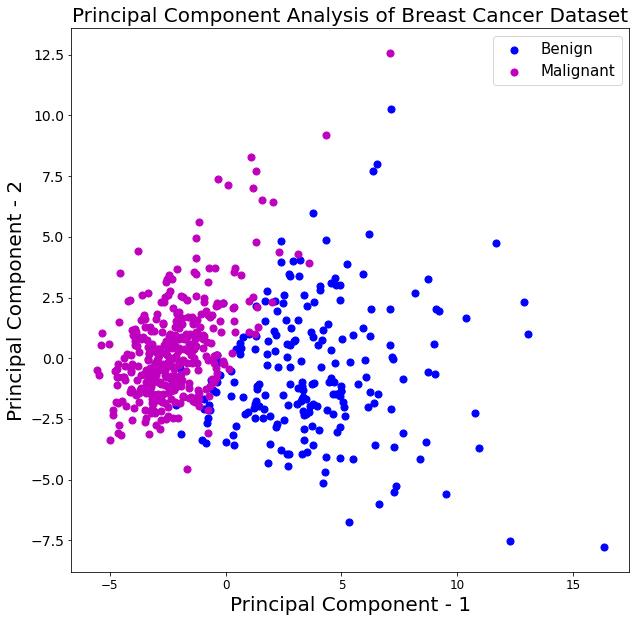

In [45]:
#The principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information.
#While projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

#plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title('Principal Component Analysis of Breast Cancer Dataset',fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'm']
marker = ['o', 's']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1'], 
                principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

Principal component analysis (PCA) reduces the dimensionality of large data sets. It reduces a large number of variables to a much smaller number of variables. The smaller set of variables still contains most of the information that was in the full data set. The reduced set of variables is easier to analyze and interpret.